In [5]:
import os
import re

import cv2
import matplotlib.pyplot as plt
import numpy as np

import depth_controller

np.set_printoptions(precision=2, suppress=True)

Segmentation masks:

0: background

1: tool

2: ILM

3: RPE


In [ ]:
masks_path = '/home/demir/Desktop/jhu_project/oct-depth-control/data/may21-1/masks_machine'
masks = []
for mask_img in os.listdir(masks_path):
    mask = cv2.imread(os.path.join(masks_path, mask_img), cv2.IMREAD_GRAYSCALE)
    masks.append(mask)

In [ ]:
test_img = cv2.imread('/home/demir/Desktop/jhu_project/oct-depth-control/data/may21-1/masks_machine/volume_0_slice_2.png', cv2.IMREAD_GRAYSCALE)
print(np.unique(test_img))
filtered_img = (test_img == 1).astype(int)
plt.imshow(test_img)

In [ ]:
# example usage
# target depth should be selected by the user in the beginning
target_depth = 0.5
# Segmented b-scans should come from the network as a list
segmented_b_scans = [] # each b-scan is a 2D numpy array
slice_idx, needle_tip = depth_controller.volume_find_needle_tip_largest_component(segmented_b_scans) 
a_scan, ilm_row, rpe_row = depth_controller.find_layers_coords(segmented_b_scans[slice_idx], needle_tip[0])
normalized_pos = depth_controller.calc_normalized_pos_between_layers(ilm_row, rpe_row, needle_tip[1])
if normalized_pos >= target_depth:
    print('needle tip is at or below target depth')

### Test using real segmentation results

In [6]:
colors = ['black', 'red', 'green', 'blue']
seg_cmap = plt.cm.colors.ListedColormap(colors)

def visualize_results(seg_mask, image, needle_tip, ilm_row, rpe_row):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(seg_mask, cmap=seg_cmap)
    # ax[0].scatter(needle_tip[0], needle_tip[1], c='r')
    ax[0].plot(ilm_row, color='r')
    ax[0].plot(rpe_row, color='r')
    ax[1].imshow(image, cmap='gray')
    ax[1].scatter(needle_tip[0], needle_tip[1], c='r')
    ax[1].plot(ilm_row, color='r')
    ax[1].plot(rpe_row, color='r')
    plt.show()

In [7]:
_nsre = re.compile('([0-9]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)]  

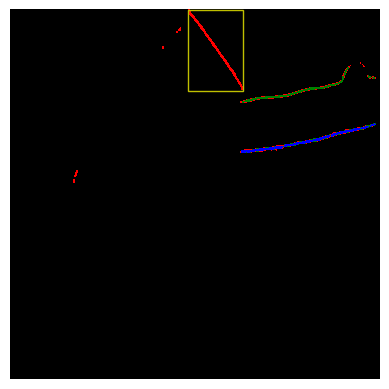

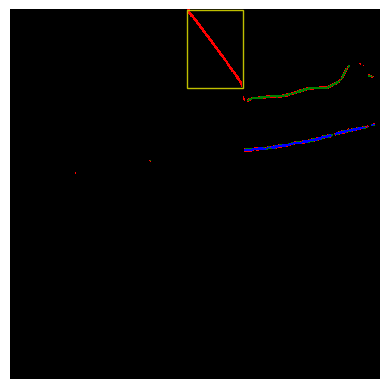

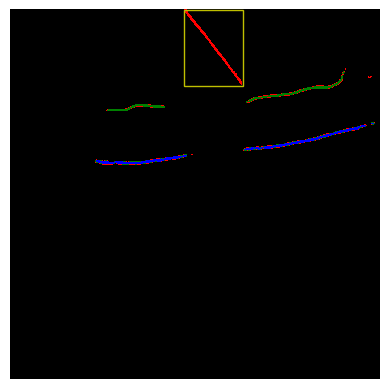

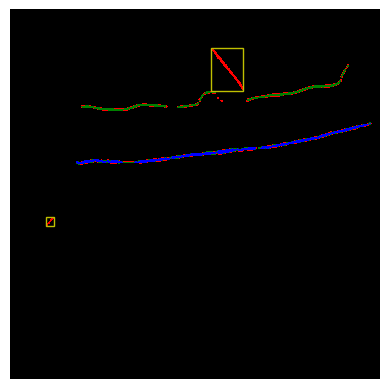

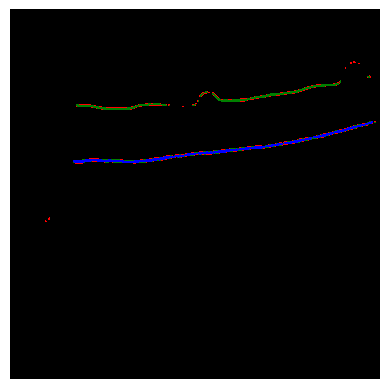

needle tip: (641, 225)
ilm: 641 255 rpe: 641 390
0


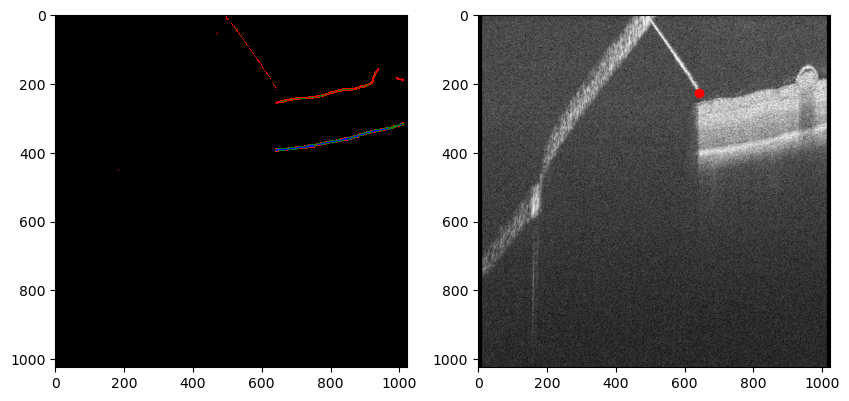

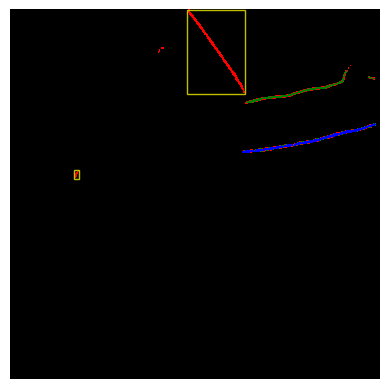

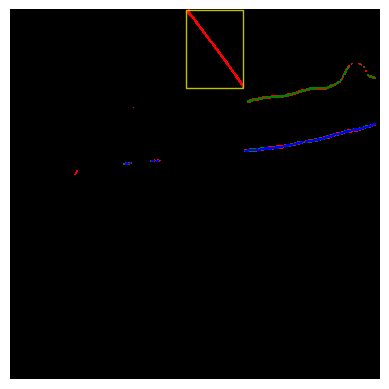

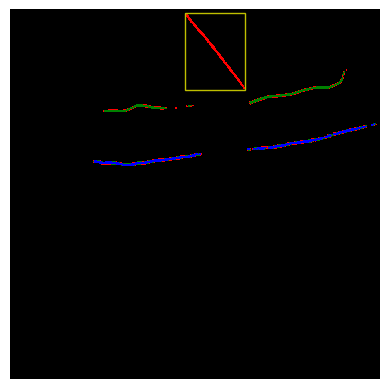

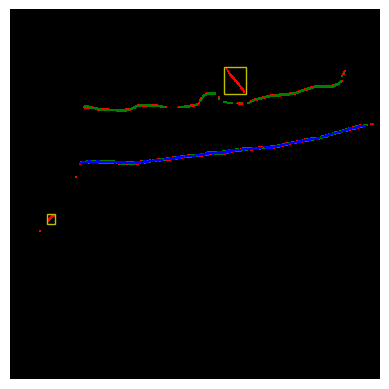

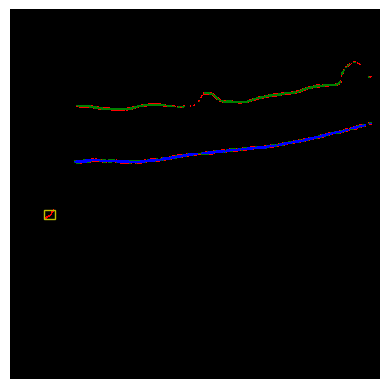

needle tip: (645, 233)
ilm: 651 257 rpe: 651 390
0


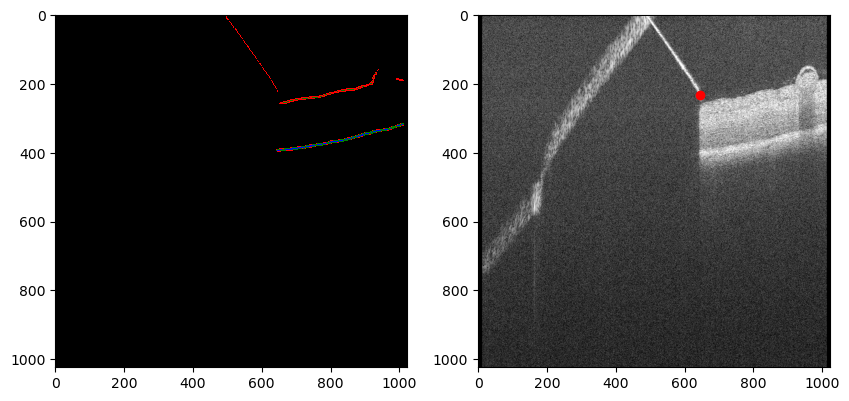

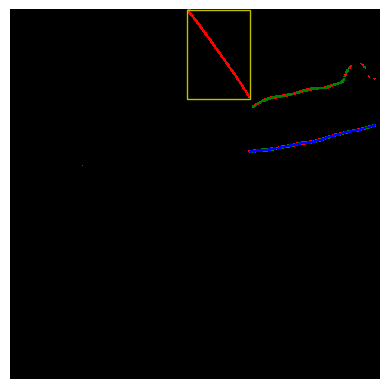

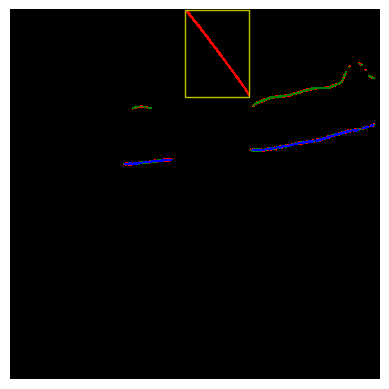

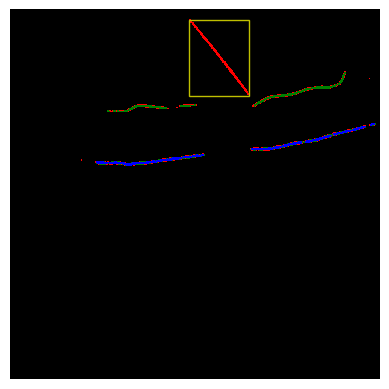

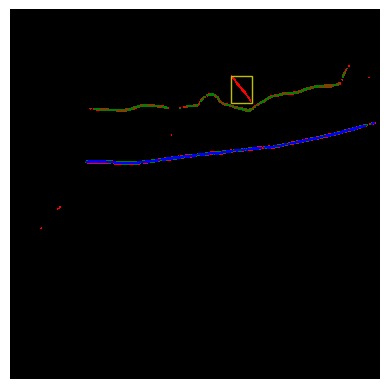

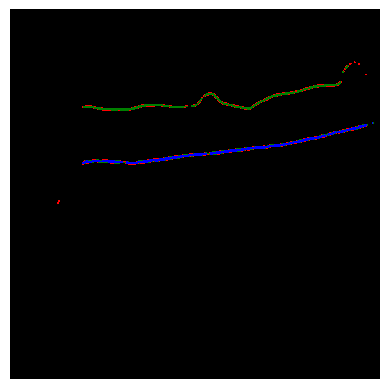

needle tip: (659, 246)
ilm: 661 396 rpe: 661 391
0


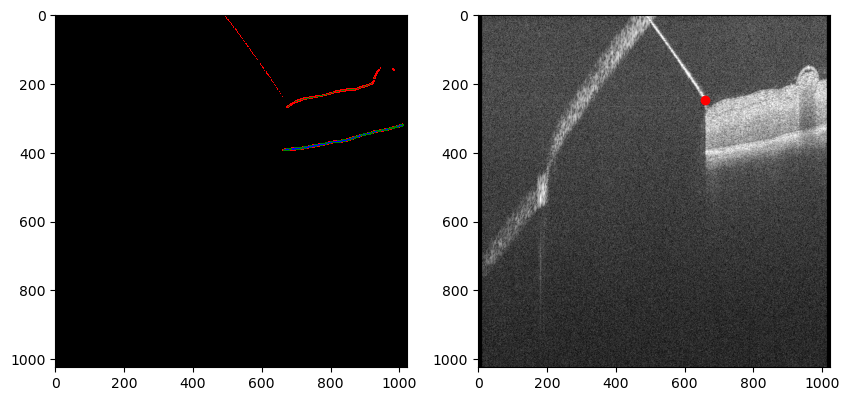

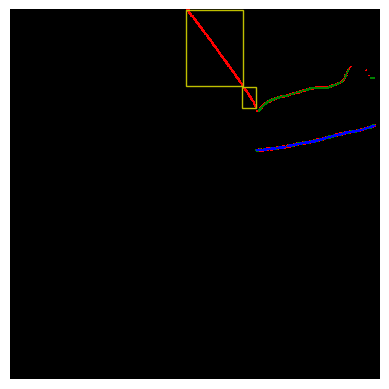

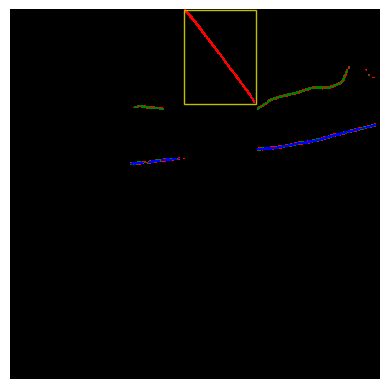

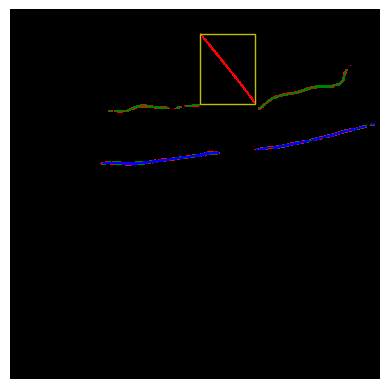

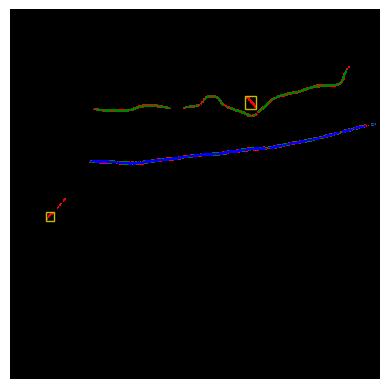

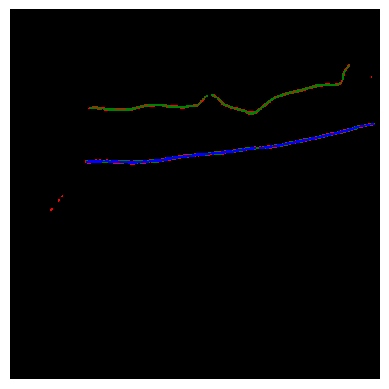

needle tip: (674, 261)
ilm: 682 386 rpe: 682 387
0


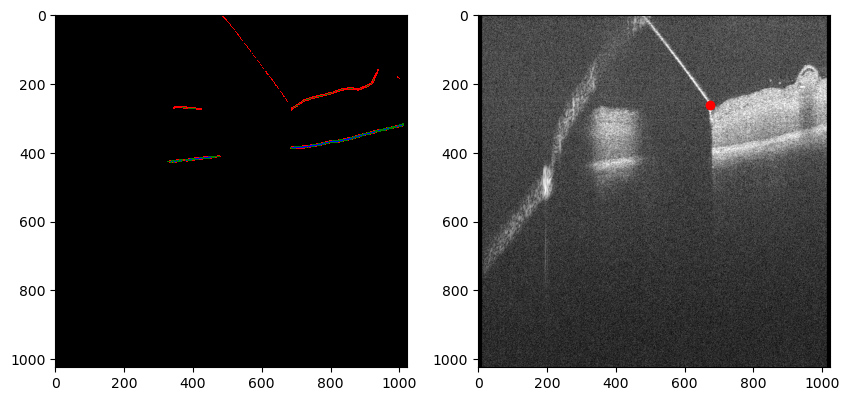

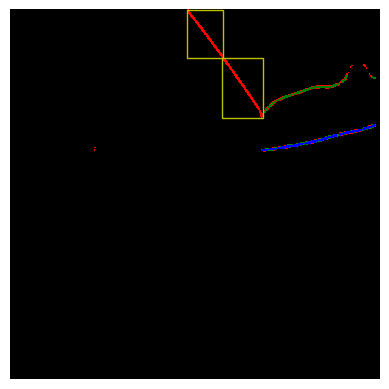

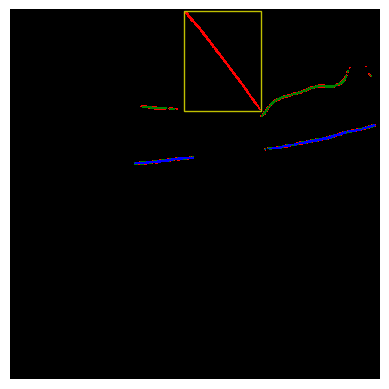

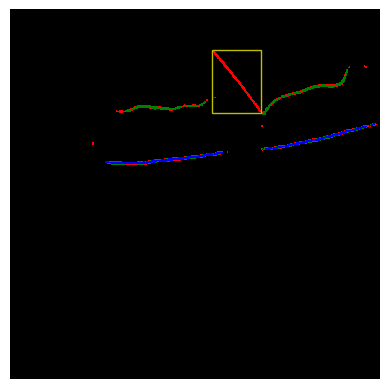

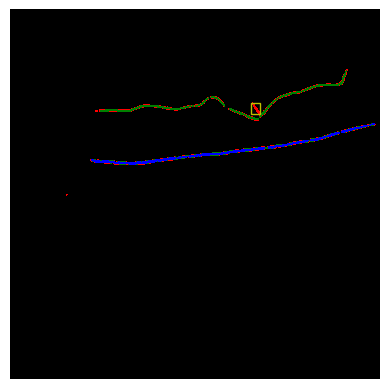

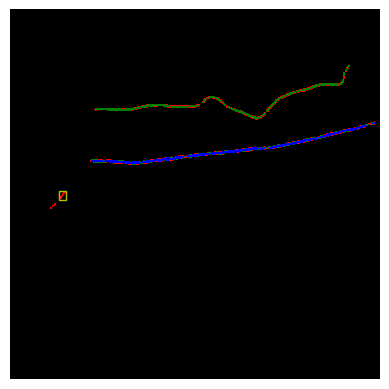

needle tip: (689, 280)
ilm: 700 287 rpe: 700 387
0


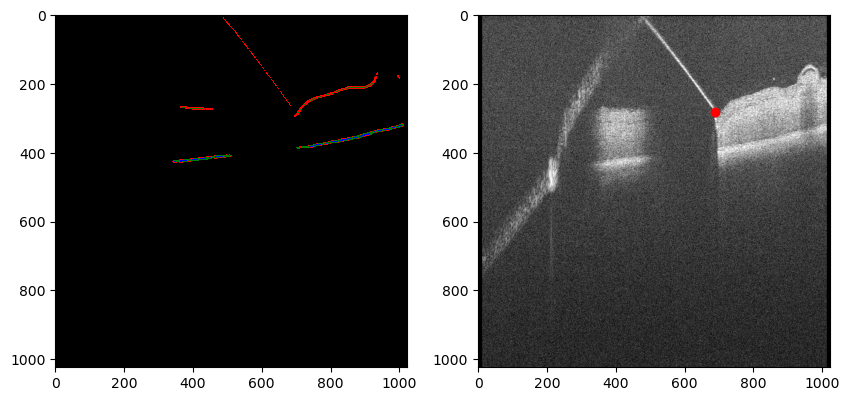

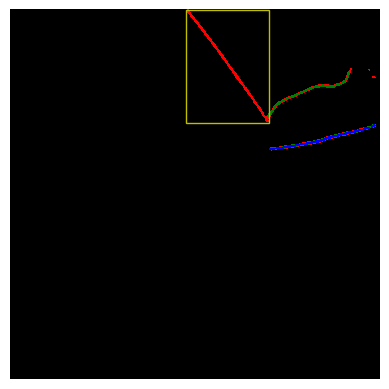

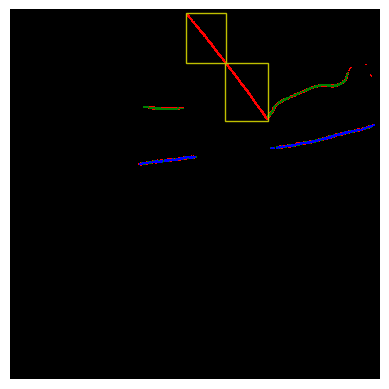

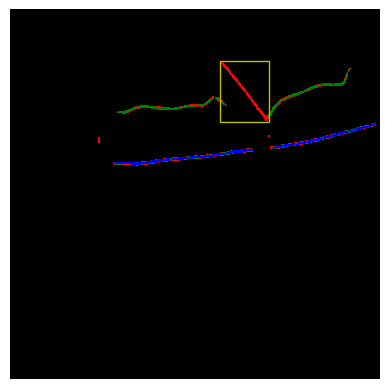

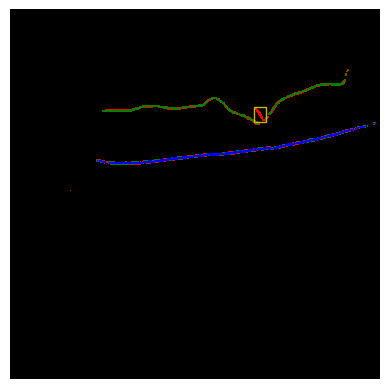

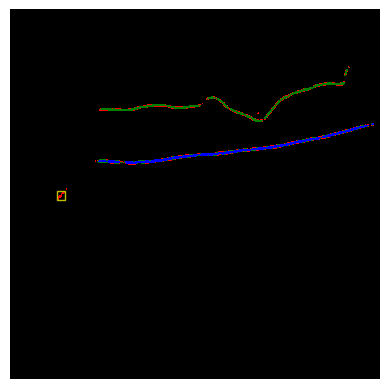

needle tip: (709, 313)
ilm: 714 291 rpe: 714 387
0.22916666666666666


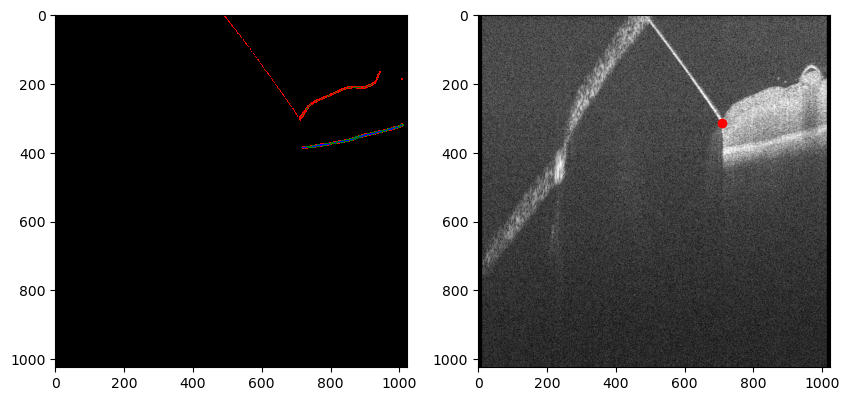

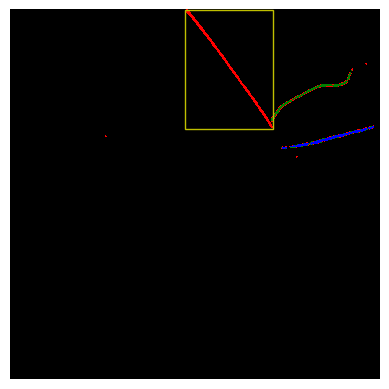

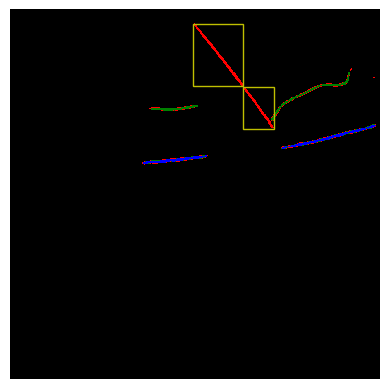

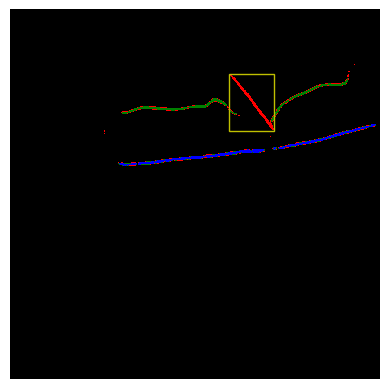

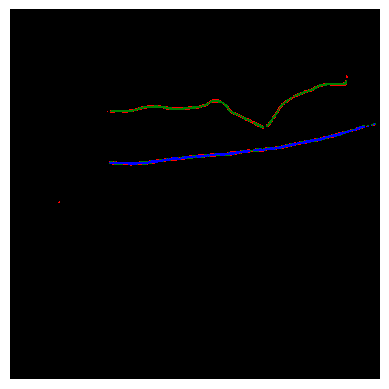

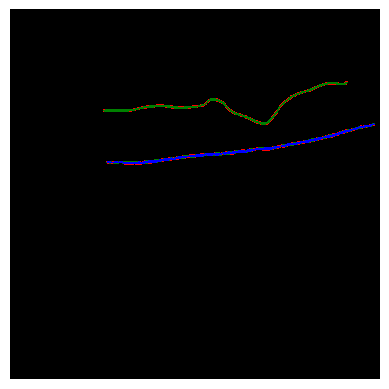

needle tip: (722, 329)
ilm: 747 268 rpe: 747 384
0.5258620689655172
needle tip is at or below target depth 0.5258620689655172


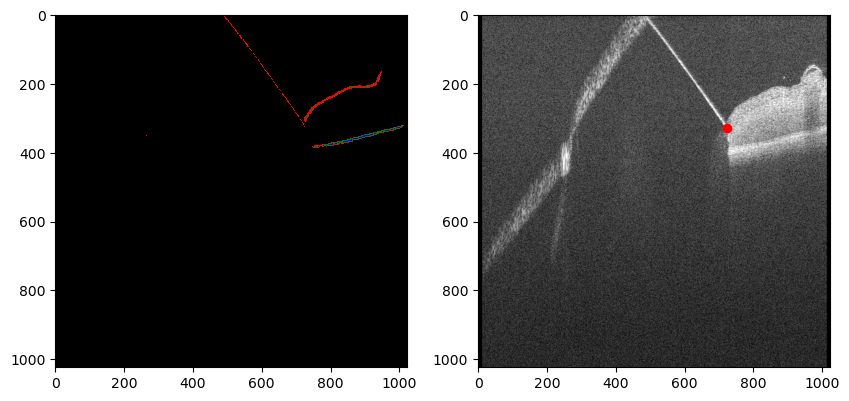

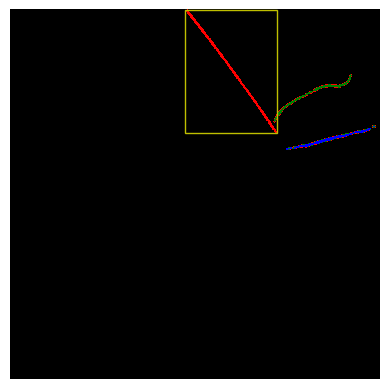

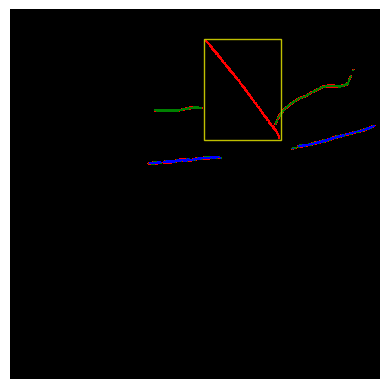

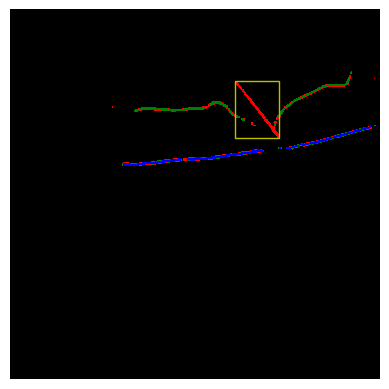

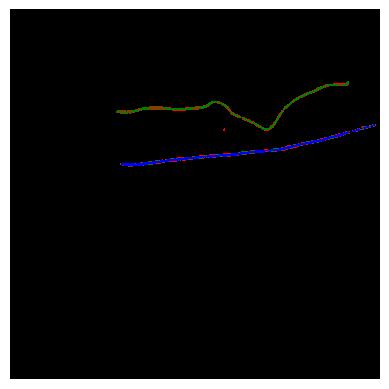

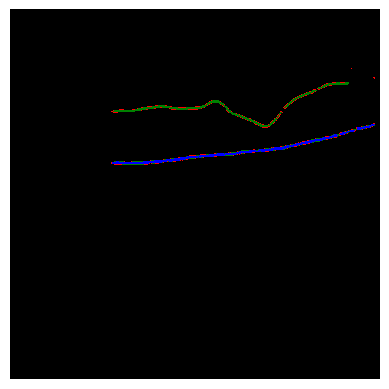

needle tip: (732, 342)
ilm: 756 271 rpe: 756 388
0.6068376068376068
needle tip is at or below target depth 0.6068376068376068


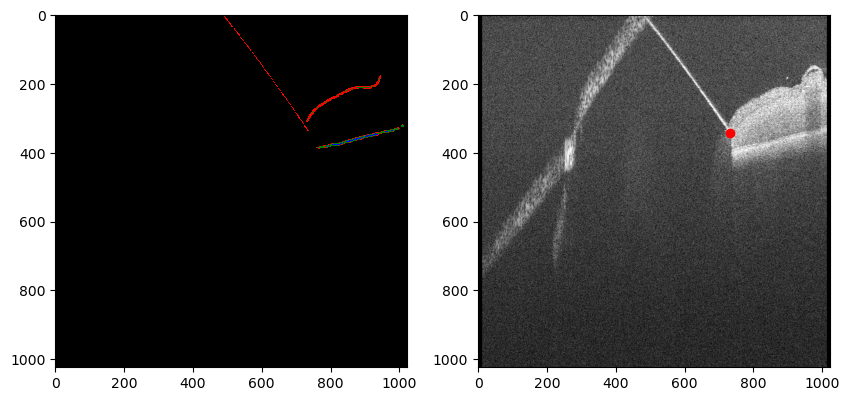

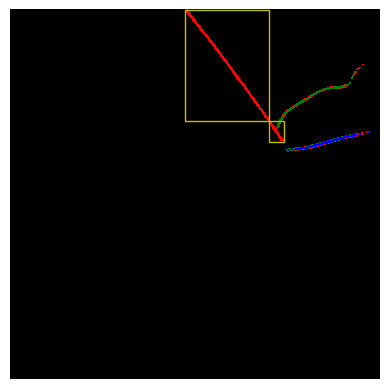

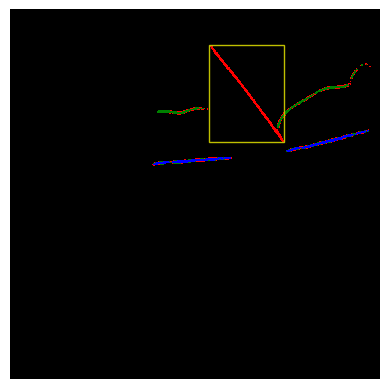

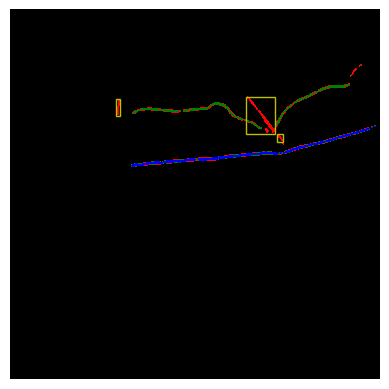

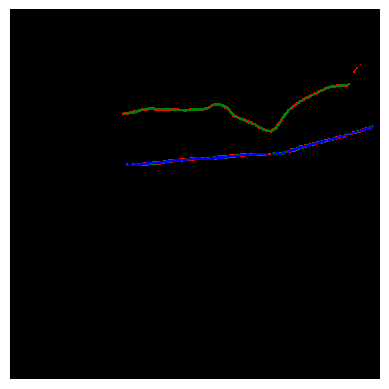

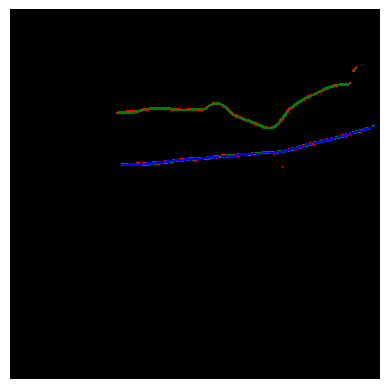

needle tip: (711, 308)
ilm: 765 281 rpe: 765 389
0.25


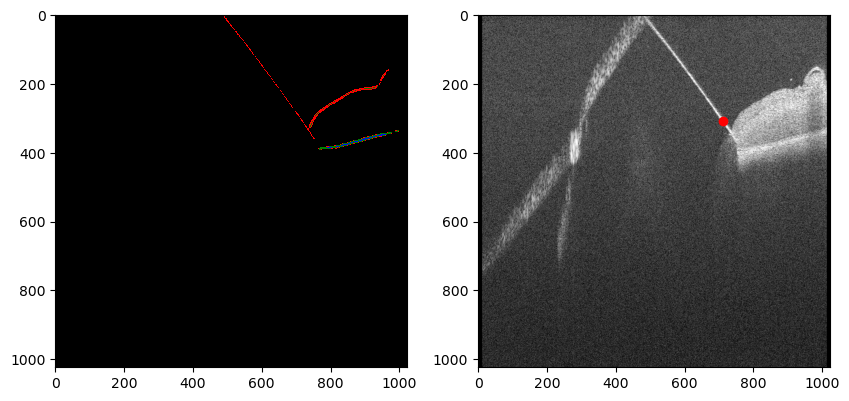

In [11]:
segmented_images_path = '/home/demir/Desktop/jhu_project/needle-segmentation/test_seg_res'
oct_images_path = '/home/demir/Desktop/jhu_project/oct_scans/jun11/2.1/images'

num_b_scans_volume = 5
target_depth = 0.5

seg_masks = [cv2.imread(os.path.join(segmented_images_path, img), cv2.IMREAD_UNCHANGED) for img in sorted(os.listdir(segmented_images_path), key=natural_sort_key)]
oct_images = [cv2.imread(os.path.join(oct_images_path, img), cv2.IMREAD_GRAYSCALE) for img in sorted(os.listdir(oct_images_path), key=natural_sort_key)]

for i in range(len(seg_masks)//num_b_scans_volume):
    volume_seg_masks = seg_masks[i*num_b_scans_volume:(i+1)*num_b_scans_volume]
    volume_oct_images = oct_images[i*num_b_scans_volume:(i+1)*num_b_scans_volume]
    volume_oct_images = [np.pad(oct_image, ((0, 0), (12, 12)), 'constant') for oct_image in volume_oct_images]
    slice_idx, needle_tip = depth_controller.volume_find_needle_tip_largest_component(volume_seg_masks, visualize=True)
    a_scan, ilm_row, rpe_row = depth_controller.find_layers_coords(volume_seg_masks[slice_idx], needle_tip[0])
    normalized_pos = depth_controller.calc_normalized_pos_between_layers(ilm_row, rpe_row, needle_tip[1])
    print('needle tip:', needle_tip)
    print('ilm:', a_scan, ilm_row, 'rpe:', a_scan, rpe_row)
    print(normalized_pos)
    if normalized_pos >= target_depth:
        print('needle tip is at or below target depth', normalized_pos)
    visualize_results(volume_seg_masks[slice_idx], volume_oct_images[slice_idx], needle_tip, ilm_row, rpe_row)
    # plt.imshow(np.pad(volume_oct_images[slice_idx], ((0, 0), (12, 12)), 'constant'))
    # plt.imshow(volume_seg_masks[slice_idx], alpha=0.5)
    # plt.scatter(needle_tip[0], needle_tip[1], c='r')
    # plt.show()
    

In [ ]:
seg_vol = seg_masks[0:5]
oct_vol = oct_images[0:5]
oct_vol = [np.pad(oct_image, ((0, 0), (12, 12)), 'constant') for oct_image in oct_vol]



In [ ]:
images_path = '/home/demir/Desktop/jhu_project/needle-segmentation/test_seg_res'

seg_masks = [cv2.imread(os.path.join(images_path, image), cv2.IMREAD_UNCHANGED) for image in sorted(os.listdir(images_path), key=natural_sort_key)]

for i in range(len(seg_masks)//5):
    vol = seg_masks[i*5:(i+1)*5]
    print(depth_controller.volume_find_needle_tip_largest_component(vol, visualize=True))